# Decision Tree - Train and Visualize

## Introduction:<a name="intro"></a>

[From this code](https://github.com/rohithaug/iris-flower-classification/blob/master/iris_classification.ipynb), we found that the **Decision Tree Classifier** is best suitable for the **Iris Data Set Classification** Problem. Let us model and visualize the complete dataset using Decision Tree. 

### Import Libraries:

In [2]:
import pandas as pd

import six
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import pydotplus
import graphviz

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

## Iris Data Set:<a name="data"></a>

Load the csv file and define the input and output variables

In [3]:
#define the column names for the pandas dataframe
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'iris_class']

#load the csv file into a new pandas dataframe
iris_df = pd.read_csv('iris.csv', names = column_names, header = 0)

#Load the input variables into X
X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values

#Load the output variable into y
y = iris_df['iris_class'].values

## Modelling:<a name="model"></a>

Model the data using Desision Tree Classification model

In [4]:
#Create an instance of the decision tree classifier
dec_tree = DecisionTreeClassifier(criterion="entropy")

#Fit the model with the training data X_train and y_train
dec_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

## Visualization:<a name="viz"></a>

Visualize the Decision Tree.

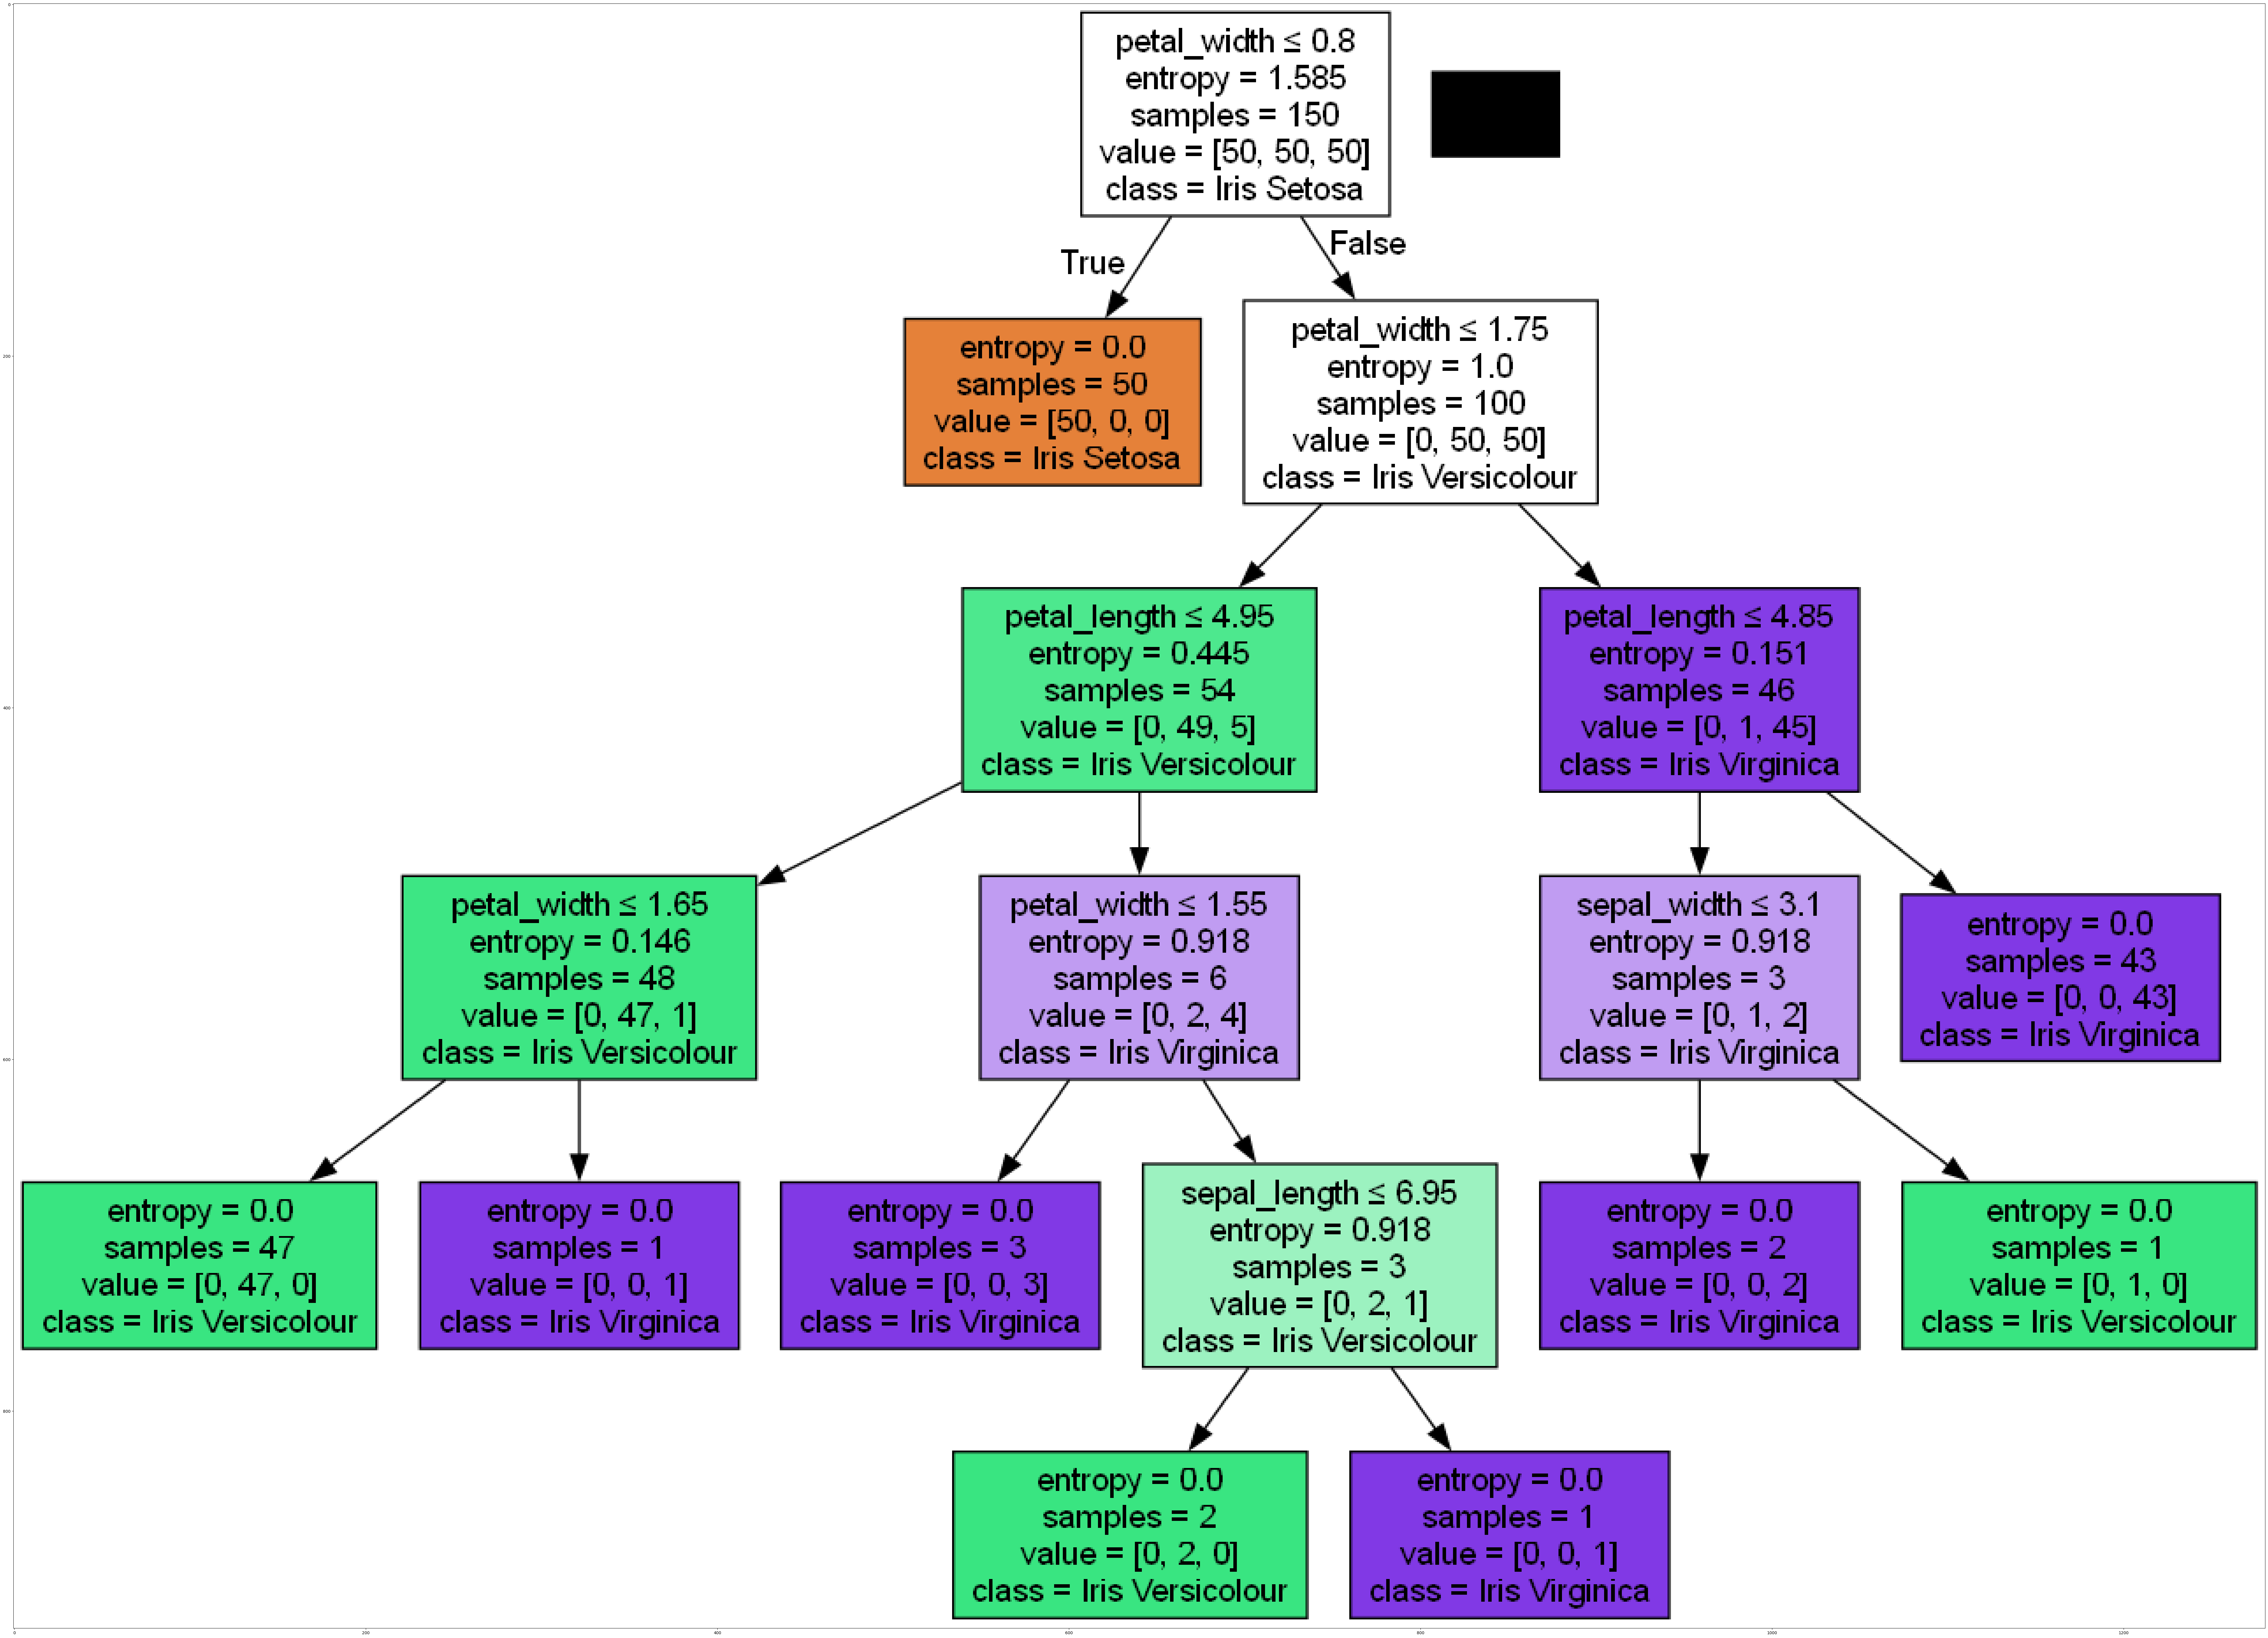

In [5]:
#initialize a StringIO class
from io import StringIO
dot_data = StringIO()

#file name to save the image
filename = "iris_flower_tree.png"

feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] #input values
class_names = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'] #output values

#convert the decision tree model into dot data
out = export_graphviz(dec_tree,
                      feature_names=feature_names,
                      out_file=dot_data,
                      class_names=class_names,
                      filled=True,
                      special_characters=True,
                      rotate=False)

#convert the dot data into a graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#save the graph
graph.write_png(filename)

#open and plot the graph
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation='nearest');